# Python skills for research in Hydrology
## Lesson 2: working with NetCDF files
  
  
Original notebook by Stephan Hoyer, Rossbypalooza, 2016.  
Modified by Edward Byers, Matthew Gidden and Fabien Maussion for EGU General Assembly 2017, Vienna, Austria.   
Adapted by Timothy Tiggeloven for the series 'Python skills for research in Hydrology' for the master Hydrology at the Vrije Universiteit Amsterdam (2019).

-------------


# With

![](./data/figures/dataset-diagram-logo.png)

# you can reach

![](./data/figures/facet-plot.png)

# Structure of this tutorial

1. Introduction to key features of `xarray`
2. Basic operations in xarray: opening, inspecting, selecting and indexing data
3. Selecting data with named dimensions



# 1. Key features of `xarray`

## What is `xarray`?

*  `xarray` is an open source project and Python package
*  `xarray` has been designed to perform **labelled** data analysis on **multi-dimensional** arrays
* the xarray approach adopts the Common Data Model for **self-describing scientific data** in widespread use in the Earth sciences
*  `xarray.Dataset` is an in-memory representation of a netCDF file.
* `xarray` is built on top of the dataprocessing library [Pandas](http://pandas.pydata.org) (the best way to work with tabular data (e.g., CSV files) in Python)

# Our data

<img src="./data/figures/dataset.png" width="50%" align="right"> 

- numeric
- multi-dimensional
- labelled
- (lots of) metadata
- sometimes (very) large

## What is `xarray` good for?

* Gridded, multi-dimensional and large datasets, commonly used in earth sciences, but also increasingly finance, engineering (signal/image processing), and biological sciences
* Integration with other data analysis packages such as Pandas 
* I/O operations (NetCDF)
* Plotting
* Out of core computation and parallel processing
* Extensions based on xarray
* ...

## Where can I find more info?

### For more information about xarray

- Read the [online documentation](http://xarray.pydata.org/)
- Ask questions on [StackOverflow](http://stackoverflow.com/questions/tagged/python-xarray)
- View the source code and file bug reports on [GitHub](http://github.com/pydata/xarray/)



# 2. Basic operations in `xarray`

-------------------

## Import python packages

In [1]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

import warnings

%matplotlib inline

np.set_printoptions(precision=3, linewidth=80, edgeitems=1)  # make numpy less verbose
xr.set_options(display_width=70)
warnings.simplefilter('ignore') # filter some warning messages

## Basic data arrays in numpy

In [2]:
import numpy as np
a = np.array([[1, 3, 9], [2, 8, 4]])
a

array([[1, 3, 9],
       [2, 8, 4]])

In [3]:
a[1, 2]

4

In [4]:
a.mean(axis=0)

array([1.5, 5.5, 6.5])

numpy is a powerful but "low-level" array manipulation tool. Axis only have numbers and no names (it is easy to forget which axis is what, a common source of trivial bugs), arrays can't carry metadata (e.g. units), and the data is unstructured (i.e. the coordinates and/or other related arrays have to be handled separately: another source of bugs).

**This is where ``xarray`` comes in!**

## Properties of `xarray.Dataset` and `xarray.DataArray` objects

We'll start with the "air_temperature" tutorial dataset. This tutorial comes with the xarray package. Other examples [here](https://github.com/pydata/xarray/tree/master/examples).

In [5]:
ds = xr.tutorial.load_dataset('air_temperature')

In [6]:
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 ... 296.19 295.69
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day)...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.nc...

In [7]:
ds.air

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[241.2    , 242.5    , ..., 235.5    , 238.59999],
        [243.79999, 244.5    , ..., 235.29999, 239.29999],
        ...,
        [295.9    , 296.19998, ..., 295.9    , 295.19998],
        [296.29   , 296.79   , ..., 296.79   , 296.6    ]],

       [[242.09999, 242.7    , ..., 233.59999, 235.79999],
        [243.59999, 244.09999, ..., 232.5    , 235.7    ],
        ...,
        [296.19998, 296.69998, ..., 295.5    , 295.1    ],
        [296.29   , 297.19998, ..., 296.4    , 296.6    ]],

       ...,

       [[245.79   , 244.79   , ..., 243.98999, 244.79   ],
        [249.89   , 249.29   , ..., 242.48999, 244.29   ],
        ...,
        [296.29   , 297.19   , ..., 295.09   , 294.38998],
        [297.79   , 298.38998, ..., 295.49   , 295.19   ]],

       [[245.09   , 244.29   , ..., 241.48999, 241.79   ],
        [249.89   , 249.29   , ..., 240.29   , 241.68999],
        ...,
        [296.09   , 296.88998, ..., 295.69   , 

In [8]:
ds.dims

Frozen(SortedKeysDict({u'lat': 25, u'lon': 53, u'time': 2920}))

In [9]:
ds.attrs

OrderedDict([(u'Conventions', u'COARDS'),
             (u'title', u'4x daily NMC reanalysis (1948)'),
             (u'description',
              u'Data is from NMC initialized reanalysis\n(4x/day).  These are the 0.9950 sigma level values.'),
             (u'platform', u'Model'),
             (u'references',
              u'http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html')])

In [10]:
ds.air.values

array([[[ 241.2 , ...,  238.6 ],
        ..., 
        [ 296.29, ...,  296.6 ]],

       ..., 
       [[ 245.09, ...,  241.79],
        ..., 
        [ 297.69, ...,  295.69]]])

In [11]:
type(ds.air.values)

numpy.ndarray

In [12]:
ds.air.dims

(u'time', u'lat', u'lon')

In [13]:
ds.air.attrs

OrderedDict([(u'long_name', u'4xDaily Air temperature at sigma level 995'),
             (u'units', u'degK'),
             (u'precision', 2),
             (u'GRIB_id', 11),
             (u'GRIB_name', u'TMP'),
             (u'var_desc', u'Air temperature'),
             (u'dataset', u'NMC Reanalysis'),
             (u'level_desc', u'Surface'),
             (u'statistic', u'Individual Obs'),
             (u'parent_stat', u'Other'),
             (u'actual_range', array([ 185.16,  322.1 ], dtype=float32))])

In [14]:
ds.air.attrs['tutorial-date'] = 27042017

In [15]:
ds.air.attrs

OrderedDict([(u'long_name', u'4xDaily Air temperature at sigma level 995'),
             (u'units', u'degK'),
             (u'precision', 2),
             (u'GRIB_id', 11),
             (u'GRIB_name', u'TMP'),
             (u'var_desc', u'Air temperature'),
             (u'dataset', u'NMC Reanalysis'),
             (u'level_desc', u'Surface'),
             (u'statistic', u'Individual Obs'),
             (u'parent_stat', u'Other'),
             (u'actual_range', array([ 185.16,  322.1 ], dtype=float32)),
             ('tutorial-date', 27042017)])

## Let's Do Some Math

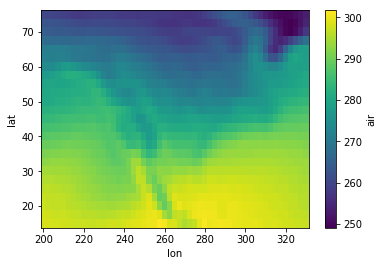

In [16]:
kelvin = ds.air.mean(dim='time')
kelvin.plot();

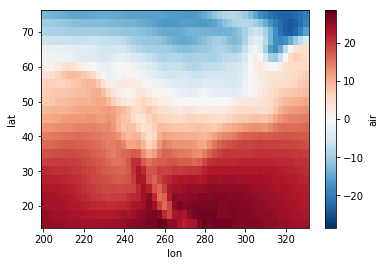

In [17]:
centigrade = kelvin - 273.16
centigrade.plot();

Notice xarray has changed the colormap according to the dataset (borrowing logic from Seaborn).
* With degrees C, the data passes through 0, so a diverging colormap is used
* With Kelvin, the default colormap is used.

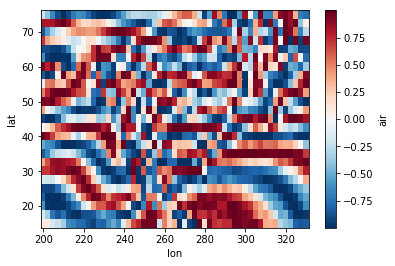

In [18]:
# ufuncs work too
np.sin(centigrade).plot();

## Adding Data to `DataSet`s

In [19]:
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Data variables:
    air      (time, lat, lon) float64 241.2 242.5 243.5 244.0 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day)...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.nc...

Let's add those kelvin and centigrade dataArrays to the dataset.

In [20]:
ds['centigrade'] = centigrade
ds['kelvin'] = kelvin
ds

<xarray.Dataset>
Dimensions:     (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat         (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 ...
  * lon         (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 ...
  * time        (time) datetime64[ns] 2013-01-01 ...
Data variables:
    air         (time, lat, lon) float64 241.2 242.5 243.5 244.0 ...
    centigrade  (lat, lon) float64 -12.78 -12.98 -13.27 -13.68 ...
    kelvin      (lat, lon) float64 260.4 260.2 259.9 259.5 259.0 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day)...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.nc...

In [21]:
ds.kelvin.attrs  # attrs are empty! Let's add some

OrderedDict()

In [22]:
ds.kelvin.attrs['Description'] = 'Mean air tempterature (through time) in kelvin.'

In [23]:
ds.kelvin

<xarray.DataArray 'kelvin' (lat: 25, lon: 53)>
array([[ 260.376442,  260.183051,  259.886627, ...,  250.815901,
         251.938116,  253.438048],
       [ 262.734394,  262.793976,  262.749339, ...,  249.755904,
         251.585757,  254.35926 ],
       [ 264.768764,  264.327308,  264.061695, ...,  250.60789 ,
         253.58351 ,  257.715599],
       ..., 
       [ 297.649863,  296.953332,  296.629315, ...,  296.810925,
         296.287962,  295.816455],
       [ 298.129202,  297.937007,  297.470394, ...,  296.859548,
         296.777027,  296.443836],
       [ 298.366151,  298.38574 ,  298.114144, ...,  297.338205,
         297.281445,  297.305103]])
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 ...
Attributes:
    Description:  Mean air tempterature (through time) in kelvin.

In [24]:
ds.to_netcdf('new file.nc')

# 3. Selecting data with named dimensions

In xarray there are many different ways for selecting and indexing data.

### Positional indexing (old way)

This is the "old way", i.e. like ``numpy``:

In [25]:
ds.air[:, 1, 2]  # note that the attributes, coordinates are preserved

<xarray.DataArray 'air' (time: 2920)>
array([ 244.7 ,  244.2 ,  244.  , ...,  248.59,  248.49,  248.39])
Coordinates:
    lat      float32 72.5
    lon      float32 205.0
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Attributes:
    long_name:      4xDaily Air temperature at sigma level 995
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    dataset:        NMC Reanalysis
    level_desc:     Surface
    statistic:      Individual Obs
    parent_stat:    Other
    actual_range:   [ 185.16  322.1 ]
    tutorial-date:  27042017

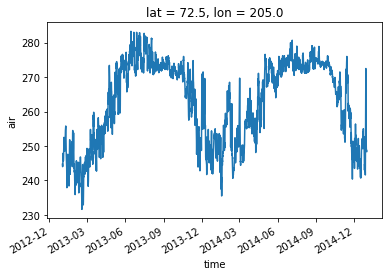

In [26]:
ds.air[:, 1, 2].plot();

This selection implies prior knowledge about the structure of the data, and is therefore much less readable than the "xarray methods" presented below.

### Selection by index

Selection based on the **index** of a coordinate:

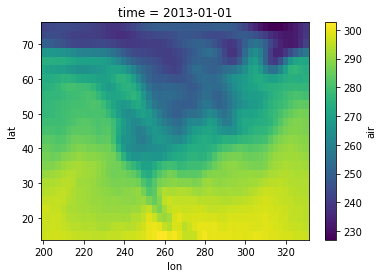

In [27]:
ds.air.isel(time=0).plot();  # like above, but with a dimension name this time

### Selection by value

Selection based on the **value** of a coordinate:

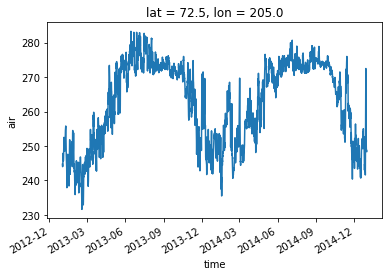

In [28]:
ds.air.sel(lat=72.5, lon=205).plot(); 

### Selection by value works well for time, too

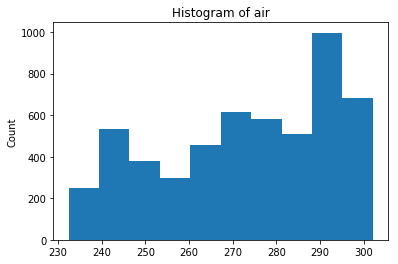

In [29]:
ds.air.sel(time='2013-01-02').plot(); # Note that we will extract 4 time steps! 3d data is plotted as histogram

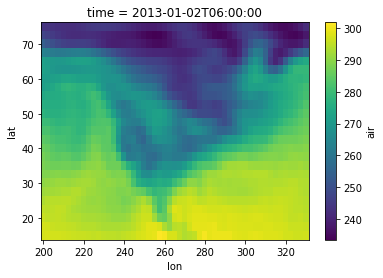

In [30]:
ds.air.sel(time='2013-01-02T06:00').plot();  # or look at a single timestep

### Selecting a range of values
The syntax is similar, but you'll need to use a [slice](https://docs.python.org/3/library/functions.html#slice):

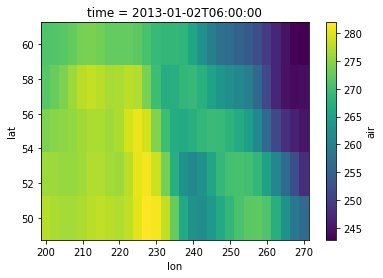

In [31]:
ds.air.sel(lat=slice(60, 50), lon=slice(200, 270), time='2013-01-02T06:00:00').plot();

### Nearest neighbor lookup

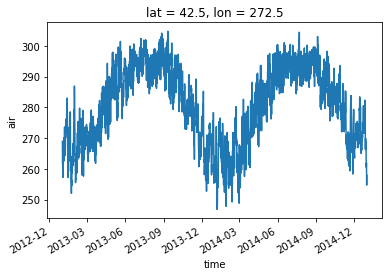

In [32]:
ds.air.sel(lat=41.8781, lon=360-87.6298, method='nearest', tolerance=5).plot();